In [1]:
import pandas as pd 
import statsmodels.formula.api as smf 
import numpy as nm 
from scipy import stats
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
q1=pd.read_csv('delivery_time.csv')

In [4]:
q1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
q1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

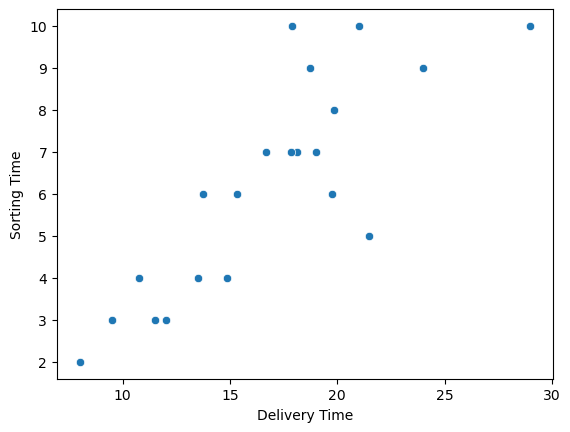

In [7]:
sns.scatterplot(x=q1['Delivery Time'],y=q1['Sorting Time'])

### Correlation

In [8]:
q1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

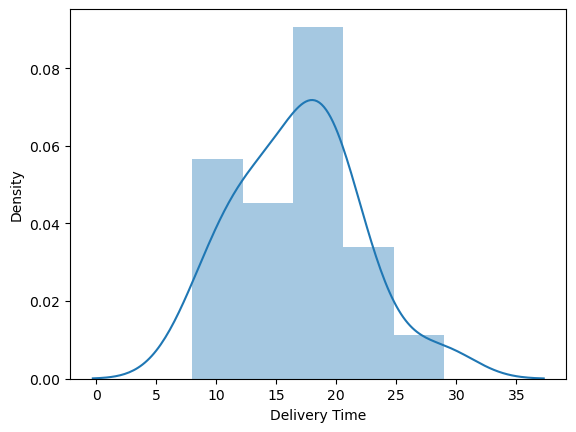

In [9]:
sns.distplot(q1['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

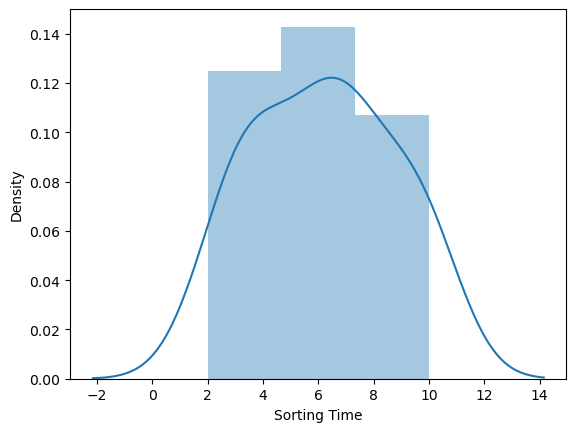

In [10]:
sns.distplot(q1['Sorting Time'])

### Rename Column

In [13]:
q1=q1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [15]:
import statsmodels.formula.api as smf 
model=smf.ols("sorting_time~delivery_time",data=q1).fit()

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

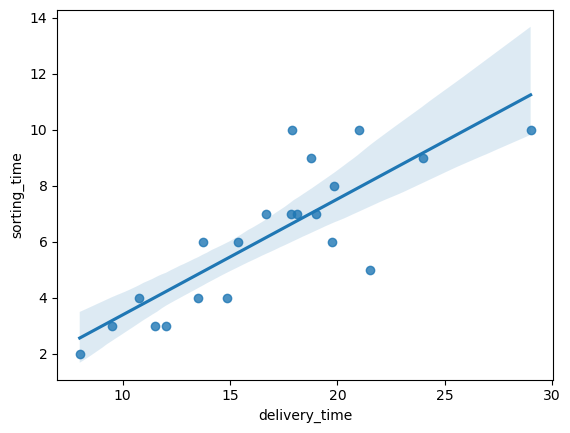

In [17]:
sns.regplot(x='delivery_time',y='sorting_time',data=q1)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        01:13:26   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [21]:
model.tvalues , model.pvalues

(Intercept       -0.667290
 delivery_time    6.387447
 dtype: float64,
 Intercept        0.512611
 delivery_time    0.000004
 dtype: float64)

In [22]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Prediction 

In [23]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [24]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [25]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


### Question2

In [28]:
q2=pd.read_csv('Salary_Data.csv')

In [29]:
q2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [30]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [31]:
q2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

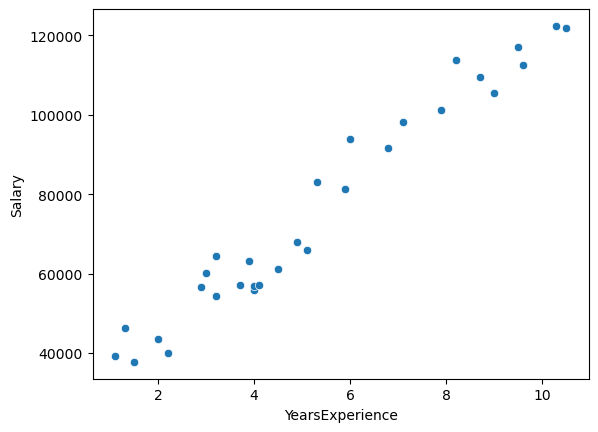

In [34]:
sns.scatterplot(x=q2['YearsExperience'],y=q2['Salary'])

### Correlation

In [35]:
q2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

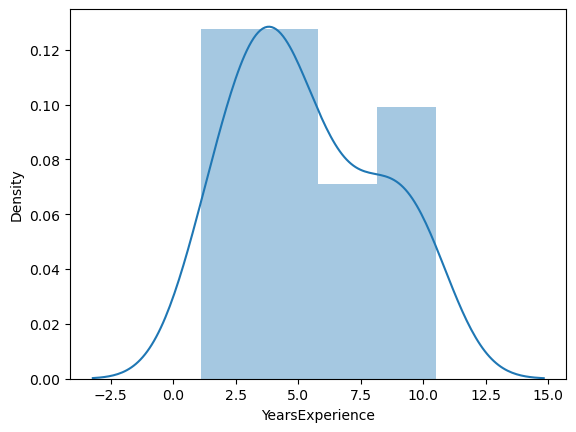

In [37]:
sns.distplot(q2['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

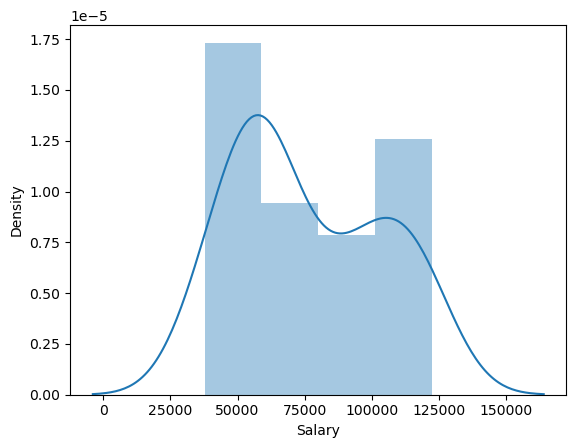

In [38]:
sns.distplot(q2['Salary'])

In [39]:
model2=smf.ols("YearsExperience~Salary",data=q2).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

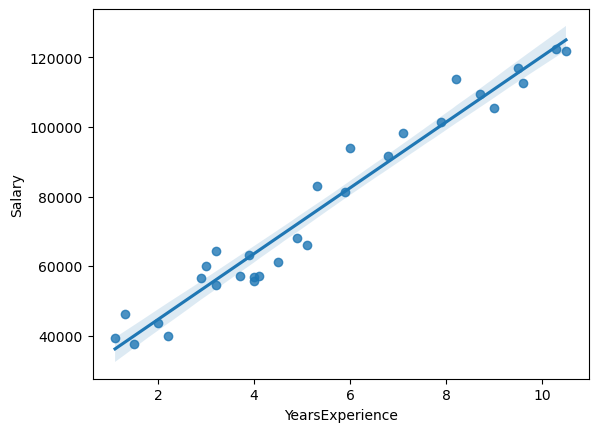

In [41]:
sns.regplot(x='YearsExperience',y='Salary',data=q2)

In [42]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        01:37:41   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
model2.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [47]:
model2.tvalues

Intercept    -7.281283
Salary       24.950094
dtype: float64

In [48]:
model2.pvalues

Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64

### Prediction

In [49]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [50]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [51]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5
